In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_style("whitegrid")


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,classification_report, confusion_matrix,f1_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [2]:
scantronMath_38_encoded_df = pd.read_csv('../dataframes/scantronMath_38_encoded.csv')
scantronMath_38_encoded_df.head()

,studentId,level,dataSource,is_proficient,proficient_score,school_Elementary A,school_Elementary School B,school_Elementary School E,school_Elementary School F,school_Intermediate School E,...,past_proficient_score,subject_math,subject_reading,subject_science,subject_social-studies,subject_music,subject_art,subject_performing-arts,subject_phys-ed,subject_career-prep
0,44777,7,value_scantronMath,False,0.935351,False,False,False,False,False,...,0.957757,2,2,2,2,1,0,0,0,0
1,44783,7,value_scantronMath,False,0.974724,False,False,False,False,False,...,0.949346,2,2,2,1,0,0,0,0,0
2,44784,6,value_scantronMath,True,1.021622,False,False,False,False,False,...,0.990132,2,2,2,2,1,0,0,0,0
3,44807,7,value_scantronMath,True,1.015190,False,False,False,False,False,...,1.035514,2,2,1,2,0,0,0,0,0
4,44809,7,value_scantronMath,False,0.921740,False,False,False,False,False,...,0.934393,2,2,2,2,1,0,0,0,0


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# w/ past_proficient_score

In [4]:
scantronMath_38_encoded_df.head()

,studentId,level,dataSource,is_proficient,proficient_score,school_Elementary A,school_Elementary School B,school_Elementary School E,school_Elementary School F,school_Intermediate School E,school_Middle School A,school_Middle School C,school_Middle School D,school_Middle School F,iready_math,iready_reading,past_proficient_score,subject_math,subject_reading,subject_science,subject_social-studies,subject_music,subject_art,subject_performing-arts,subject_phys-ed,subject_career-prep
0,44777,7,value_scantronMath,False,0.935351,False,False,False,False,False,True,False,False,False,0,0,0.957757,2,2,2,2,1,0,0,0,0
1,44783,7,value_scantronMath,False,0.974724,False,False,False,False,False,True,False,False,False,0,0,0.949346,2,2,2,1,0,0,0,0,0
2,44784,6,value_scantronMath,True,1.021622,False,False,False,False,False,True,False,False,False,0,0,0.990132,2,2,2,2,1,0,0,0,0
3,44807,7,value_scantronMath,True,1.015190,False,False,False,False,False,True,False,False,False,0,0,1.035514,2,2,1,2,0,0,0,0,0
4,44809,7,value_scantronMath,False,0.921740,False,False,False,False,False,True,False,False,False,0,0,0.934393,2,2,2,2,1,0,0,0,0


In [5]:
scantronMath_38_encoded_df.dtypes

studentId                         int64
level                             int64
dataSource                       object
is_proficient                      bool
proficient_score                float64
school_Elementary A                bool
school_Elementary School B         bool
school_Elementary School E         bool
school_Elementary School F         bool
school_Intermediate School E       bool
school_Middle School A             bool
school_Middle School C             bool
school_Middle School D             bool
school_Middle School F             bool
iready_math                       int64
iready_reading                    int64
past_proficient_score           float64
subject_math                      int64
subject_reading                   int64
subject_science                   int64
subject_social-studies            int64
subject_music                     int64
subject_art                       int64
subject_performing-arts           int64
subject_phys-ed                   int64


In [6]:
#turning bools into ints
scantronMath_38_encoded_df[scantronMath_38_encoded_df.select_dtypes(include=['bool']).columns] = scantronMath_38_encoded_df.select_dtypes(include=['bool']).astype(int)
scantronMath_38_encoded_df.dtypes

studentId                         int64
level                             int64
dataSource                       object
is_proficient                     int64
proficient_score                float64
school_Elementary A               int64
school_Elementary School B        int64
school_Elementary School E        int64
school_Elementary School F        int64
school_Intermediate School E      int64
school_Middle School A            int64
school_Middle School C            int64
school_Middle School D            int64
school_Middle School F            int64
iready_math                       int64
iready_reading                    int64
past_proficient_score           float64
subject_math                      int64
subject_reading                   int64
subject_science                   int64
subject_social-studies            int64
subject_music                     int64
subject_art                       int64
subject_performing-arts           int64
subject_phys-ed                   int64


In [7]:
print(scantronMath_38_encoded_df.isnull().sum())  

studentId                          0
level                              0
dataSource                         0
is_proficient                      0
proficient_score                   0
school_Elementary A                0
school_Elementary School B         0
school_Elementary School E         0
school_Elementary School F         0
school_Intermediate School E       0
school_Middle School A             0
school_Middle School C             0
school_Middle School D             0
school_Middle School F             0
iready_math                        0
iready_reading                     0
past_proficient_score           5422
subject_math                       0
subject_reading                    0
subject_science                    0
subject_social-studies             0
subject_music                      0
subject_art                        0
subject_performing-arts            0
subject_phys-ed                    0
subject_career-prep                0
dtype: int64


In [8]:
scantronMath_38_encoded_df = scantronMath_38_encoded_df.dropna(subset=['past_proficient_score'])
print(scantronMath_38_encoded_df.isnull().sum())  

studentId                       0
level                           0
dataSource                      0
is_proficient                   0
proficient_score                0
school_Elementary A             0
school_Elementary School B      0
school_Elementary School E      0
school_Elementary School F      0
school_Intermediate School E    0
school_Middle School A          0
school_Middle School C          0
school_Middle School D          0
school_Middle School F          0
iready_math                     0
iready_reading                  0
past_proficient_score           0
subject_math                    0
subject_reading                 0
subject_science                 0
subject_social-studies          0
subject_music                   0
subject_art                     0
subject_performing-arts         0
subject_phys-ed                 0
subject_career-prep             0
dtype: int64


Training

In [9]:
#training
y = scantronMath_38_encoded_df['proficient_score']
X= scantronMath_38_encoded_df.drop(['proficient_score', 'is_proficient', 'studentId','dataSource', 'level'], axis=1)
print("Number of examples: " + str(X.shape[0]))
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.25,stratify= scantronMath_38_encoded_df['is_proficient'], random_state=123)
print(X_train.shape)
print(X_test.shape)

Number of examples: 15149
(11361, 21)
(3788, 21)


In [10]:
#setting up the param grid, possible hyperparameter for max_depth and n_estimators:The number of trees in the forest.
max_depth_values38 = [18,23,32]
n_estimators_value38 = [250,300,350]
param_grid38 = {'max_depth' : list(max_depth_values38), 'n_estimators' : list(n_estimators_value38)}

In [74]:
'''
print("Running Grid Search")
rf_regressor38 = RandomForestRegressor()

# will have a 3-fold cross validation 
rf_grid38 = GridSearchCV(rf_regressor38, param_grid38, cv=3, scoring='neg_root_mean_squared_error')
rf_grid_search38 = rf_grid38.fit(X_train, y_train)

print("Done")
rf_best_params38 = rf_grid_search38.best_params_

rf_best_params38
'''

#{'max_depth': 18, 'n_estimators': 350}

'\nprint("Running Grid Search")\nrf_regressor38 = RandomForestRegressor()\n\n# will have a 3-fold cross validation \nrf_grid38 = GridSearchCV(rf_regressor38, param_grid38, cv=3, scoring=\'neg_root_mean_squared_error\')\nrf_grid_search38 = rf_grid38.fit(X_train, y_train)\n\nprint("Done")\nrf_best_params38 = rf_grid_search38.best_params_\n\nrf_best_params38\n'

In [13]:
rf_model38 = RandomForestRegressor(max_depth=18, n_estimators=350)
rf_model38.fit(X_train,y_train)
y_rf_pred38 = rf_model38.predict(X_test)
rf_rmse = mean_squared_error(y_test, y_rf_pred38, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred38)
#trying to get f1 and accuracy score 
threshold = 1
y_pred38_bool = y_rf_pred38 >= threshold
y_test38_bool = y_test >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test38_bool, y_pred38_bool))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test38_bool, y_pred38_bool))

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))        

threshold= 1

Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.90      0.89      2581
        True       0.78      0.74      0.76      1207

    accuracy                           0.85      3788
   macro avg       0.83      0.82      0.83      3788
weighted avg       0.85      0.85      0.85      3788


Confusion Matrix:
[[2333  248]
 [ 310  897]]
[RF] Root Mean Squared Error: 0.04848161829904366
[RF] R2: 0.5555227500531885


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [76]:
#looking at the micro score
micro_f1 = f1_score(y_test38_bool, y_pred38_bool, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.854012671594509


Confusion Matrix:
[[2340  241]
 [ 312  895]]


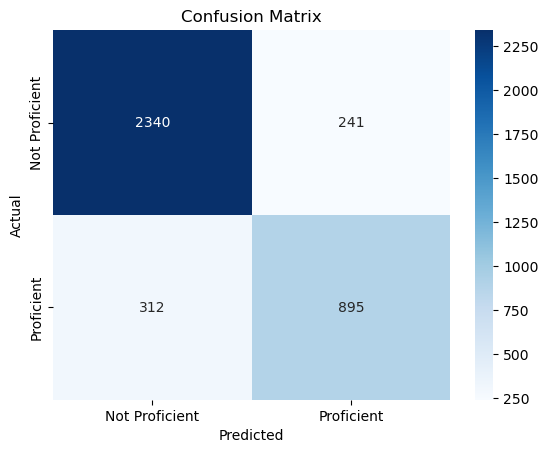

In [77]:
cm = confusion_matrix(y_test38_bool, y_pred38_bool)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, plot the confusion matrix using seaborn heatmap for better visualization
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Proficient", "Proficient"], yticklabels=["Not Proficient", "Proficient"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Feature Importance

In [80]:
importances = rf_model38.feature_importances_
feature_names = X_train.columns

# Combine names and importances, and sort
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df= importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(importance_df)

                         Feature  Importance
11         past_proficient_score    0.909104
15        subject_social-studies    0.012060
2     school_Elementary School E    0.011338
7         school_Middle School D    0.008726
8         school_Middle School F    0.007693
19               subject_phys-ed    0.006739
3     school_Elementary School F    0.006097
16                 subject_music    0.004549
6         school_Middle School C    0.004471
14               subject_science    0.004355
12                  subject_math    0.004294
13               subject_reading    0.004151
5         school_Middle School A    0.003534
10                iready_reading    0.002881
9                    iready_math    0.002389
4   school_Intermediate School E    0.002045
1     school_Elementary School B    0.001790
0            school_Elementary A    0.001722
20           subject_career-prep    0.001089
17                   subject_art    0.000869
18       subject_performing-arts    0.000102


In [82]:
importance_df.head(50)

,Feature,Importance
11,past_proficient_score,0.909104
15,subject_social-studies,0.012060
2,school_Elementary School E,0.011338
7,school_Middle School D,0.008726
8,school_Middle School F,0.007693
19,subject_phys-ed,0.006739
3,school_Elementary School F,0.006097
16,subject_music,0.004549
6,school_Middle School C,0.004471
14,subject_science,0.004355


# no past_proficient_score

In [14]:
scantronMath_38_encoded_df = pd.read_csv('../dataframes/scantronMath_38_encoded.csv')
scantronMath_38_encoded_df.head()

,studentId,level,dataSource,is_proficient,proficient_score,school_Elementary A,school_Elementary School B,school_Elementary School E,school_Elementary School F,school_Intermediate School E,school_Middle School A,school_Middle School C,school_Middle School D,school_Middle School F,iready_math,iready_reading,past_proficient_score,subject_math,subject_reading,subject_science,subject_social-studies,subject_music,subject_art,subject_performing-arts,subject_phys-ed,subject_career-prep
0,44777,7,value_scantronMath,False,0.935351,False,False,False,False,False,True,False,False,False,0,0,0.957757,2,2,2,2,1,0,0,0,0
1,44783,7,value_scantronMath,False,0.974724,False,False,False,False,False,True,False,False,False,0,0,0.949346,2,2,2,1,0,0,0,0,0
2,44784,6,value_scantronMath,True,1.021622,False,False,False,False,False,True,False,False,False,0,0,0.990132,2,2,2,2,1,0,0,0,0
3,44807,7,value_scantronMath,True,1.015190,False,False,False,False,False,True,False,False,False,0,0,1.035514,2,2,1,2,0,0,0,0,0
4,44809,7,value_scantronMath,False,0.921740,False,False,False,False,False,True,False,False,False,0,0,0.934393,2,2,2,2,1,0,0,0,0


In [28]:
#training
X = scantronMath_38_encoded_df.drop(['proficient_score', 'is_proficient', 'studentId','dataSource', 'level', 'past_proficient_score'], axis=1)
y = scantronMath_38_encoded_df['proficient_score']
print("Number of examples: " + str(X.shape[0]))
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.25,stratify= scantronMath_38_encoded_df['is_proficient'], random_state=123)
print(X_train.shape)
print(X_test.shape)

Number of examples: 20571
(15428, 20)
(5143, 20)


In [38]:
X.shape

(20571, 20)

In [29]:
#setting up the param grid, possible hyperparameter for max_depth and n_estimators:The number of trees in the forest.
max_depths = [5,15, 30]
n_estimators = [100,250,400]
param_grid = {'max_depth' : list(max_depths), 'n_estimators' : list(n_estimators)}

In [30]:
print("Running Grid Search")
rf_regressor = RandomForestRegressor()

# will have a 3-fold cross validation 
rf_grid = GridSearchCV(rf_regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error')
rf_grid_search = rf_grid.fit(X_train, y_train)

print("Done")
rf_best_params = rf_grid_search.best_params_

rf_best_params

Running Grid Search
Done


{'max_depth': 5, 'n_estimators': 100}

In [42]:
rf_model = RandomForestRegressor(max_depth=5, n_estimators=100)
rf_model.fit(X_train,y_train)
y_rf_pred = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred)
#trying to get f1 and accuracy score 
threshold = 0.97
y_pred_bool = y_rf_pred >= threshold
y_test_bool = y_test >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test_bool, y_pred_bool))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_bool, y_pred_bool))

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))        

threshold= 0.97

Classification Report:
              precision    recall  f1-score   support

       False       0.50      0.97      0.66      2558
        True       0.60      0.04      0.08      2585

    accuracy                           0.50      5143
   macro avg       0.55      0.51      0.37      5143
weighted avg       0.55      0.50      0.37      5143


Confusion Matrix:
[[2484   74]
 [2473  112]]
[RF] Root Mean Squared Error: 0.08522218747781826
[RF] R2: 0.0030024663405822105


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


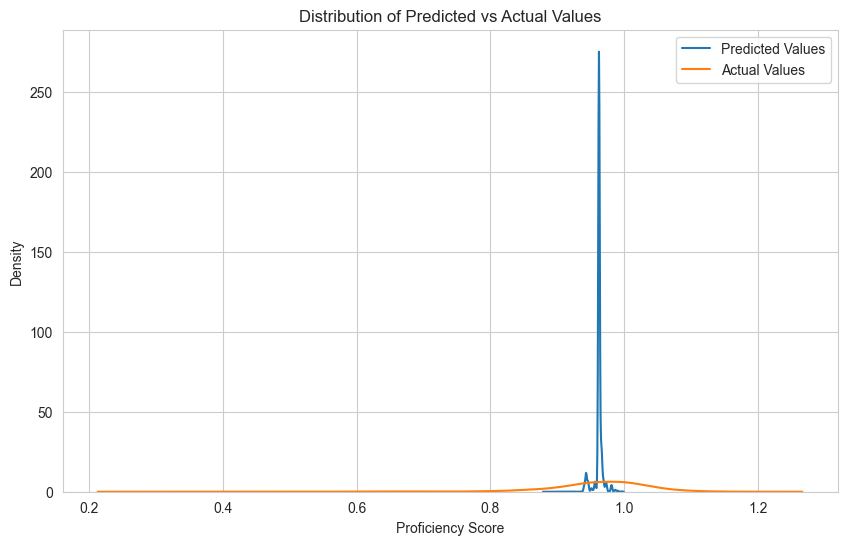

In [46]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=y_rf_pred, label='Predicted Values')
sns.kdeplot(data=y_test, label='Actual Values')
plt.title('Distribution of Predicted vs Actual Values')
plt.xlabel('Proficiency Score')
plt.ylabel('Density')
plt.legend()
plt.show()

In [34]:
#looking at the micro score
micro_f1 = f1_score(y_test_bool, y_pred_bool, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.6904530429710286


Confusion Matrix:
[[3550    2]
 [1590    1]]


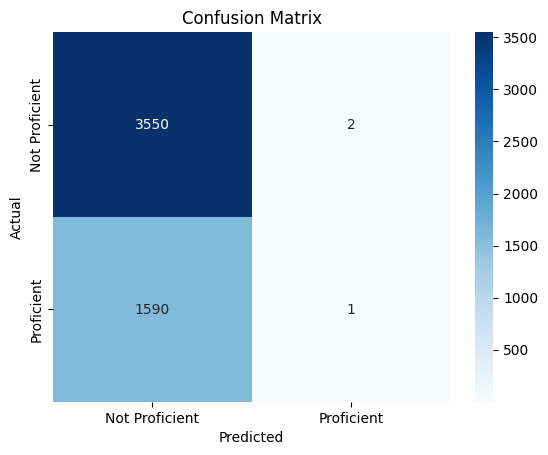

In [35]:
cm = confusion_matrix(y_test_bool, y_pred_bool)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, plot the confusion matrix using seaborn heatmap for better visualization
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Proficient", "Proficient"], yticklabels=["Not Proficient", "Proficient"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Feature Importance

In [36]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Combine names and importances, and sort
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df= importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(importance_df)

                         Feature  Importance
10                iready_reading    0.146148
8         school_Middle School F    0.124767
15                 subject_music    0.100329
14        subject_social-studies    0.090749
1     school_Elementary School B    0.081996
9                    iready_math    0.078573
6         school_Middle School C    0.057039
13               subject_science    0.047874
12               subject_reading    0.044267
2     school_Elementary School E    0.042393
3     school_Elementary School F    0.041828
11                  subject_math    0.039038
5         school_Middle School A    0.028739
16                   subject_art    0.023756
7         school_Middle School D    0.018398
17       subject_performing-arts    0.014207
18               subject_phys-ed    0.013914
4   school_Intermediate School E    0.003720
0            school_Elementary A    0.001630
19           subject_career-prep    0.000635


In [37]:
importance_df.head(50)

,Feature,Importance
10,iready_reading,0.146148
8,school_Middle School F,0.124767
15,subject_music,0.100329
14,subject_social-studies,0.090749
1,school_Elementary School B,0.081996
9,iready_math,0.078573
6,school_Middle School C,0.057039
13,subject_science,0.047874
12,subject_reading,0.044267
2,school_Elementary School E,0.042393
